<a href="https://colab.research.google.com/github/Marisagf/Projetos_de_Ciencias_de_Dados/blob/main/Previs%C3%A3o_de_Sobreviv%C3%AAncia_ao_C%C3%A2ncer_de_Mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Previsão de Sobrevivência ao Câncer de Mama**

 Com o avanço das tecnologias e o aumento da disponibilidade de dados na área da saúde, o uso de aprendizado de máquina se tornou uma ferramenta poderosa para apoiar decisões clínicas e salvar vidas.

Um exemplo prático disso é a possibilidade de prever a sobrevivência de pacientes com doenças graves, como o câncer de mama, utilizando algoritmos que analisam padrões nos dados clínicos.

Neste estudo, utilizamos um conjunto de dados reais com informações de pacientes com câncer de mama para treinar um modelo capaz de prever se um paciente tem maior probabilidade de sobrevivência (vivo) ou não (óbito), com base em características como idade, estágio do câncer, tratamentos realizados, entre outros.

📌 Fonte dos dados: Kaggle
🔗 Breast Cancer Dataset – AmandaM1



#### *Conjunto de Dados*

Este conjunto de dados consiste em um grupo de pacientes com câncer de mama que passaram por cirurgia para remover o tumor. O conjunto de dados é composto pelas seguintes variáveis:

    - Patient_ID: identificador único do paciente
    - Age: idade no momento do diagnóstico (anos)
    - Gender: Masculino/Feminino
    - Protein1, Protein2, Protein3, Protein4: níveis de expressão (unidades não definidas)
    - Tumour_Stage: I, II, III
    - Histology: Carcinoma Ductal Infiltrante, Carcinoma Lobular Infiltrante, Carcinoma Mucinoso
    - ER status: Positivo/Negativo
    - PR status: Positivo/Negativo
    - HER2 status: Positivo/Negativo
    - Surgery_type: Lumpectomia, Mastectomia Simples, Mastectomia Radical Modificada, Outro
    - Date_of_Surgery: Data em que a cirurgia foi realizada (em DD-MON-YY)
    - Date_of_Last_Visit: Data da última visita (em DD-MON-YY) [pode ser nulo, caso o paciente não tenha retornado após a cirurgia]
    - Patient_Status: Vivo/Morto [pode ser nulo, caso o paciente não tenha retornado após a cirurgia e não haja informação disponível sobre se o paciente está vivo ou morto].



#### *Importação das bibliotecas *

In [2]:
# Os nossos pacotes tradicionais
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Os pacotes para normalização e preparação dos dados
import sklearn  #para identificação da versão
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

# Os pacotes destinados a aprendizagem de máquina (algoritmos)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Importando o método SMOTE da biblioteca imblearn
from imblearn.over_sampling import SMOTE

# Dentro da biblioteca <'imbalanced-learn'> existe um método <'SMOTE'> que significa: Synthetic Minority Over-sampling Technique.
# Ou seja... O SMOTE é uma técnica de oversampling que cria novas instâncias sintéticas da classe minoritária no conjunto de dados,
# a fim de balancear a distribuição das classes.

# Os pacotes destinados a report de métricas dos modelos
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score, classification_report

# para evitar mensagens de alerta/warnings.
import warnings
warnings.filterwarnings("ignore")

# Carregar o módulo de funções para limpeza de dados
from limpeza_dados import *

#### *Importação do Dataset*

In [4]:
brca = pd.read_csv("/content/BRCA.csv")

In [ ]:
# Visualização do cabeçalho dos dados
brca.head()

In [5]:
brca.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


#### *Limpeza dos Dados Nulos*

In [6]:
# verificando se existe algum valor nulo
calcular_porcentagem_valores_ausentes(brca)

O conjunto de dados tem 2.6% de valores ausentes.


In [7]:
# Exibindo o relatório de valores nulos por coluna
relatorio_valores_ausentes_por_coluna(brca)

O conjunto de dados tem 16 colunas. 
Foram encontradas 16 colunas com valores ausentes.


,Quantidade de Ausentes,Porcentagem de Ausentes,Tipo de Dado
Date_of_Last_Visit,24,7.04,object
Patient_Status,20,5.87,object
Patient_ID,7,2.05,object
Age,7,2.05,float64
Protein2,7,2.05,float64
Protein3,7,2.05,float64
Gender,7,2.05,object
Protein1,7,2.05,float64
Tumour_Stage,7,2.05,object
Protein4,7,2.05,float64


In [8]:
# Limpando os registros que não possuem Status (vivo ou morto)
brca.dropna(subset='Patient_Status', inplace = True)

In [9]:
# verificando se existe algum valor nulo
calcular_porcentagem_valores_ausentes(brca)

O conjunto de dados tem 0.08% de valores ausentes.


In [10]:
# Exibindo o relatório de valores nulos por coluna
relatorio_valores_ausentes_por_coluna(brca)

O conjunto de dados tem 16 colunas. 
Foram encontradas 1 colunas com valores ausentes.


,Quantidade de Ausentes,Porcentagem de Ausentes,Tipo de Dado
Date_of_Last_Visit,4,1.25,object


In [11]:
# limpando esses últims 4 valores nulos
brca.dropna(subset='Date_of_Last_Visit', inplace = True)

In [12]:
# verificando se existe algum valor nulo
calcular_porcentagem_valores_ausentes(brca)

O conjunto de dados tem 0.0% de valores ausentes.


In [13]:
# Exibindo o relatório de valores nulos por coluna
relatorio_valores_ausentes_por_coluna(brca)

O conjunto de dados tem 16 colunas. 
Foram encontradas 0 colunas com valores ausentes.


,Quantidade de Ausentes,Porcentagem de Ausentes,Tipo de Dado


#### *Análise exploratória dos dados (EDA - Exploratory Data Analysis)*

In [14]:
# Vamos obter as informações do dataset
brca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    float64
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float64(5)

In [15]:
# Verificando o quantitativo de homens e mulheres na base de dados
brca['Gender'].value_counts()

,count
Gender,
FEMALE,313
MALE,4


O Gênero como uma característica no treinamento do modelo provavelmente não será útil, pois não há ocorrências suficientes de pacientes do sexo masculino.

#### *Análise gráfica*

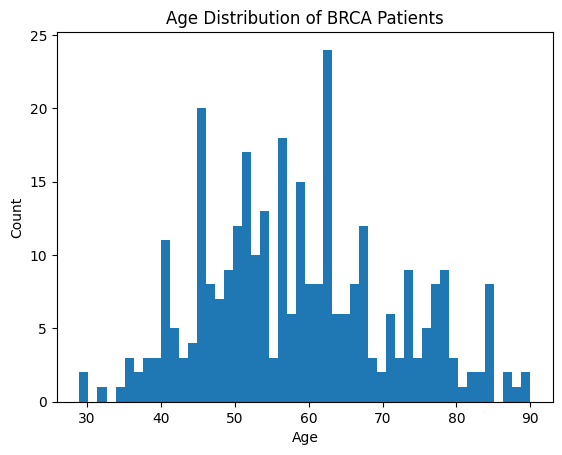

In [16]:
brca['Age'].hist(bins = 50, grid = False)
plt.xlabel(xlabel = "Age")
plt.ylabel(ylabel = "Count")
plt.title("Age Distribution of BRCA Patients")
plt.show()

Os grupos etários no conjunto de dados parecem estar distribuídos principalmente de forma normal, com leve assimetria à direita - a maioria da população está no grupo etário de 45 a 55 anos.

In [17]:
brca['Histology'].unique()

array(['Infiltrating Ductal Carcinoma', 'Mucinous Carcinoma',
       'Infiltrating Lobular Carcinoma'], dtype=object)

Relação entre a insidência desses tipos de cancer na população do dataset

In [21]:
def plot_pie_chart(column, title):
    # define Seaborn color palette to use
    palette_color = sns.color_palette('bright')

    # plotting data on chart
    plt.pie(brca[column].value_counts(), labels=brca[column].unique(), colors=palette_color, autopct='%.0f%%')

    plt.title(title)
    # displaying chart
    plt.show()

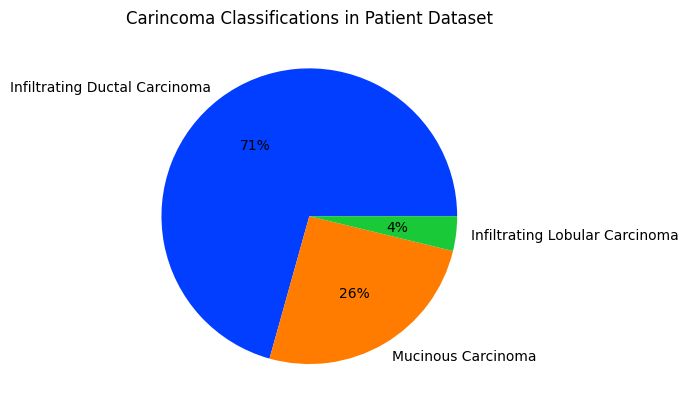

In [22]:
plot_pie_chart("Histology", "Carincoma Classifications in Patient Dataset")

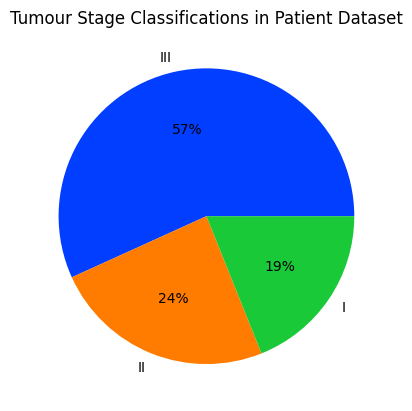

In [23]:
# Verificar a distribuição por estágio, sabendo-se que o estágio I é o inicial e o estágio III o mais avançado.
plot_pie_chart("Tumour_Stage", "Tumour Stage Classifications in Patient Dataset")

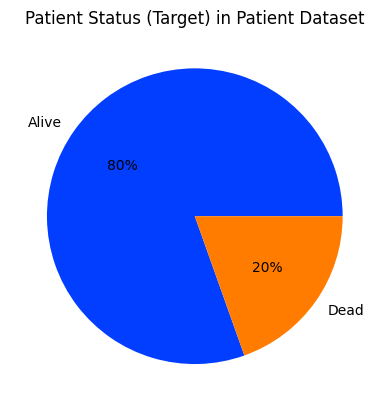

In [24]:
# Identificando a variável alvo para o modelo de predição (duas categorias: vivo (alive) ou morto (Dead))
plot_pie_chart("Patient_Status", "Patient Status (Target) in Patient Dataset")

Identificamos que o conjunto de dados para nosso alvo está bastante desequilibrado em relação aos pacientes vivos. Isso tornaria difícil fazer classificações adequadas sem reamostrar o conjunto de dados.


#### *Preprocessamento dos Dados*

In [25]:
# Fazendo uma cópia do dataset original e detetando os atributos que não são representativos
brca_processed = brca.copy().drop(columns=['Patient_ID', 'Surgery_type', 'Gender', 'ER status', 'PR status'])

In [26]:
# Encode da coluna objetivo (target feature) para valor numérico (inteiro) para o processo de classificação
le = LabelEncoder()
brca_processed['Patient_Status_le'], brca_processed['HER2_Status_le'] = le.fit_transform(brca_processed['Patient_Status']), le.fit_transform(brca_processed['HER2 status'])

In [27]:
brca_processed.head()

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Patient_Status_le,HER2_Status_le
0,36.0,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,15-Jan-17,19-Jun-17,Alive,0,0
1,43.0,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,26-Apr-17,09-Nov-18,Dead,1,0
2,69.0,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,08-Sep-17,09-Jun-18,Alive,0,0
3,56.0,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,25-Jan-17,12-Jul-17,Alive,0,0
4,56.0,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,06-May-17,27-Jun-19,Dead,1,0


In [28]:
# Encode de valores ordinais para o estágio do tumor: categorico para numerico
oe = OrdinalEncoder(dtype=int)
brca_processed['Tumour_Stage_oe'] = oe.fit_transform(np.array(brca_processed['Tumour_Stage']).reshape(-1,1))
brca_processed.drop(columns=['Tumour_Stage', 'Date_of_Surgery', 'Date_of_Last_Visit'], inplace=True)

In [29]:
# Encode binário da coluna Histology ou seja, o tipo de cancer.
# O método get_dummies() do pandas é usado para criar variáveis dummy a partir de uma variável categórica.
# Variáveis dummy são variáveis ​​binárias que representam categorias distintas.
brca_processed = pd.get_dummies(brca_processed, columns=['Histology'], dtype = int)

In [30]:
brca_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 333
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       317 non-null    float64
 1   Protein1                                  317 non-null    float64
 2   Protein2                                  317 non-null    float64
 3   Protein3                                  317 non-null    float64
 4   Protein4                                  317 non-null    float64
 5   HER2 status                               317 non-null    object 
 6   Patient_Status                            317 non-null    object 
 7   Patient_Status_le                         317 non-null    int64  
 8   HER2_Status_le                            317 non-null    int64  
 9   Tumour_Stage_oe                           317 non-null    int64  
 10  Histology_Infiltrating Ductal Carcinoma   3

In [31]:
brca_processed.head()

,Age,Protein1,Protein2,Protein3,Protein4,HER2 status,Patient_Status,Patient_Status_le,HER2_Status_le,Tumour_Stage_oe,Histology_Infiltrating Ductal Carcinoma,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma
0,36.0,0.080353,0.42638,0.54715,0.273680,Negative,Alive,0,0,2,1,0,0
1,43.0,-0.420320,0.57807,0.61447,-0.031505,Negative,Dead,1,0,1,0,0,1
2,69.0,0.213980,1.31140,-0.32747,-0.234260,Negative,Alive,0,0,2,1,0,0
3,56.0,0.345090,-0.21147,-0.19304,0.124270,Negative,Alive,0,0,1,1,0,0
4,56.0,0.221550,1.90680,0.52045,-0.311990,Negative,Dead,1,0,1,1,0,0


Como dito, temos 80% de pessoas que sobreviveram e apenas 20% das que morreram. Isso, no treinamento, causa desequilíbrio, deixando o modelo tendencioso. Temos que fazer o possível para equalizar os dados.... Existem muitas formas. Uma das mais utilizadas é a criação de dados sintéticos para a classe minoritária.


In [42]:
# dividindo o dataset
X_train, X_test, y_train, y_test = train_test_split(brca_processed.drop(columns=['Patient_Status', 'Patient_Status_le', 'HER2 status']), brca_processed['Patient_Status_le'], test_size = 0.15, random_state = 42, stratify=brca_processed['Patient_Status_le'])

In [44]:
# reamostrar o conjunto de dados para que a característica alvo seja distribuida uniformemente
oversample = SMOTE( random_state=0)
X_train, y_train = oversample.fit_resample(X_train, y_train)

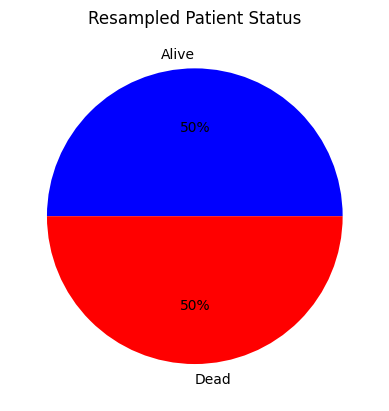

In [45]:
# Colocando os dados já reamostrados em um plot
plt.pie(y_train.value_counts(), labels=brca_processed['Patient_Status'].unique(), colors='bright', autopct='%.0f%%')

plt.title("Resampled Patient Status")
# Exibindo o plot (gráfico)
plt.show()

Agora que temos o dataset devidamente balanceado, vamos fazer o treinamento utilizando quatro algoritmos de regressão:
- Support Vector Classification (SVC),
- Regressão Logística (Logistic Regression),
- Random Forest e
- Árvore de Decisão.

## **Support Vector Classification (SVC)**

In [46]:
# O módulo SVC e indica que o modelo deve calcular as probabilidades das previsões ('probability=True')
svc = SVC(probability=True)
# Definição dos parâmetros que serão testados durante o processo de GridSearchCV.
# Serão testados dois tipos de kernel: linear e rbf
# O parâmetro c identifica o processo de regularização. Dois serão testados: 1 que é o padrão e um mais elevado com 10.
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
# instanciamento do GrudSearch, utilizando o estimador svc, com os parâmetros definidos acima
# e n_jobs define a quantidade de processos serão realizados em paralelo (50).
clf = GridSearchCV(svc, parameters, n_jobs=50)
# ajuste do modelo com os dados do treinamento
clf.fit(X_train, y_train)
# GridSearchCV(estimator=SVC(), param_grid={'C': [1, 100], 'kernel': ('linear', 'rbf')})
# o parâmetro "best_estimator_", com base na validação cruzada, seleciona a combinação de parâmetros que produz o melhor desempenho do modelo
clf.best_estimator_

SVC(C=1, kernel='linear', probability=True)

Melhor estimador escolhido durante o ajuste/GridSearch mostra hiperparâmetros para o modelo.

##**Regressão Logística (Logistic Regression)**

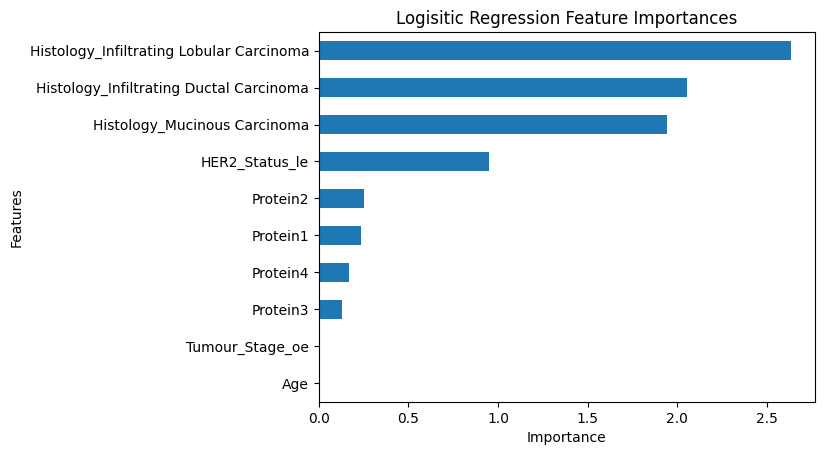

In [47]:
# O Modelo de Regressão Logistica com os parâmetros: max_iter: número máximo de iterações.
# Tipo de penalidade utilizada: "elasticnet" --> combina penalidade L1 (lasso) e L2 (Ridge).
# solver = 'saga' --> algoritmo de otimização utlizado. Adequado para elasticnet e funciona bem com grandes volumes de dados esparsos.
# l1_ratio = 1 --> especifica que na mistura entre L1 e L2 no cálculo da penalidade, terá prioridade o L1.
logit = LogisticRegression(max_iter=3500, penalty='elasticnet', solver = 'saga', l1_ratio=1)
# ajuste do modelo aos dados de treinamento
logit.fit(X_train, y_train)
# extraimos as importâncias dos coeficientes ajustados do modelo. Trata-se de um vetor pois estamos lidando com uma classificação binária.
logit_importances = logit.coef_[0]
# criamos uma série para armazenar os coeficientes
logit_feature_importances = pd.Series(index = X_train.columns, data= np.abs(logit_importances))
# ordenamos os coeficientes em orde crescente
logit_feature_importances = logit_feature_importances.sort_values(ascending=True)
# criamos aqui um gráfico de barras horizontais mostrando as importâncias das características
logit_feature_importances.plot(kind='barh', title = 'Logisitic Regression Feature Importances', xlabel = 'Importance', ylabel = 'Features')
plt.show()

em desenvolvimento ...